# Plots

In [1]:

import sys
sys.path.append('/home/hamid/ensemble_tool/EnsembleTools/')

## Download from Atlas and Load

In [2]:
from dpet.ensemble_analysis import EnsembleAnalysis
from dpet.featurization.distances import (featurize_com_dist, calc_ca_dmap, calc_ca_dmap)

ens_codes = [
    'PED00161e001',
    'PED00160e001',
   
]
data_dir = '/home/hamid/PED_Data_analysis/nikola'

analysis = EnsembleAnalysis(ens_codes, data_dir)
analysis.download_from_database(database='ped')
analysis.generate_trajectories()

File already exists. Skipping download.
File already exists. Skipping extracting.
File already exists. Skipping download.
File already exists. Skipping extracting.
Trajectory already exists for ensemble PED00161e001. Loading trajectory.
Trajectory already exists for ensemble PED00160e001. Loading trajectory.


/home/hamid/anaconda3/envs/ped/lib/python3.11/site-packages/neo_force_scheme/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


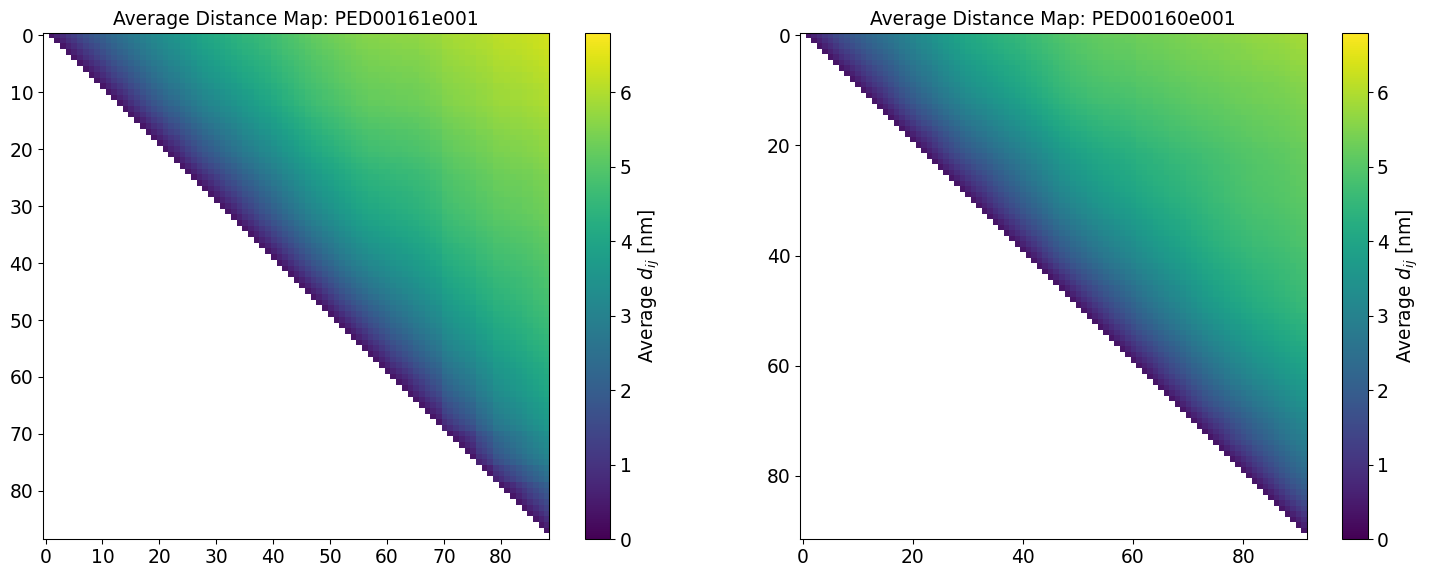

In [3]:
analysis.plot_average_dmap_comparison()

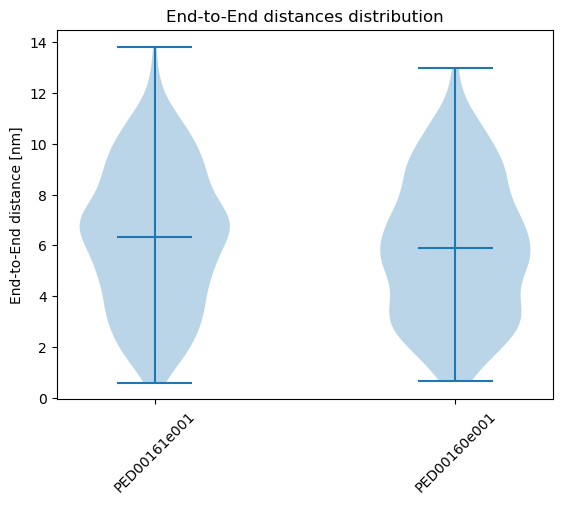

In [3]:
analysis.end_to_end_distances_plot(bins=50,atom_selector='name CA' ,violin_plot=True, median=False, means=True)

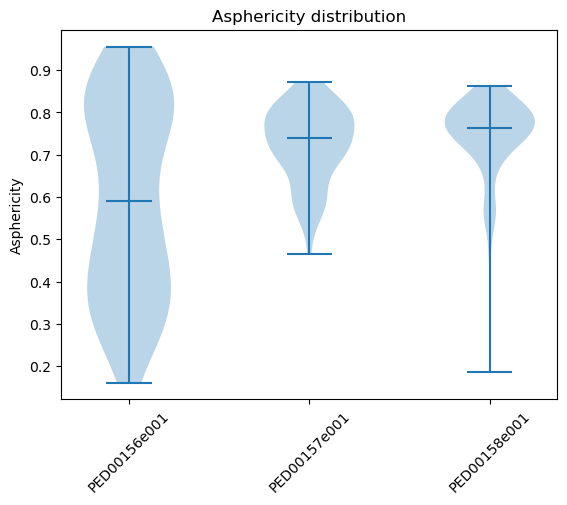

In [ ]:
analysis.plot_asphericity_dist(bins=10, violin_plot=True)

Pearson coeff for PED00156e001 = 0.892
Pearson coeff for PED00157e001 = 0.357
Pearson coeff for PED00158e001 = 0.598


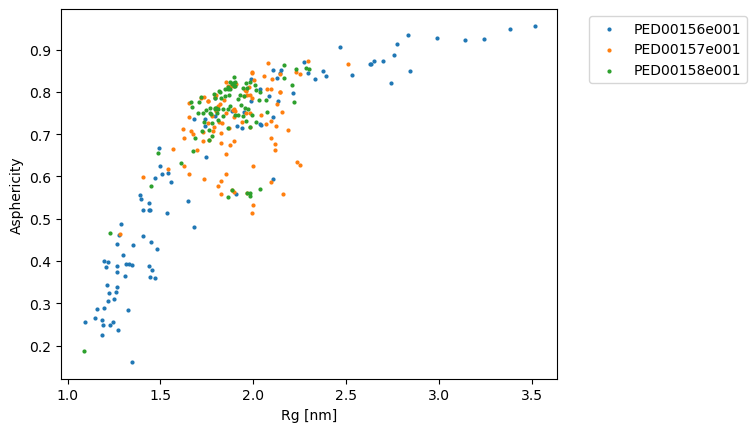

In [ ]:
analysis.plot_rg_vs_asphericity()

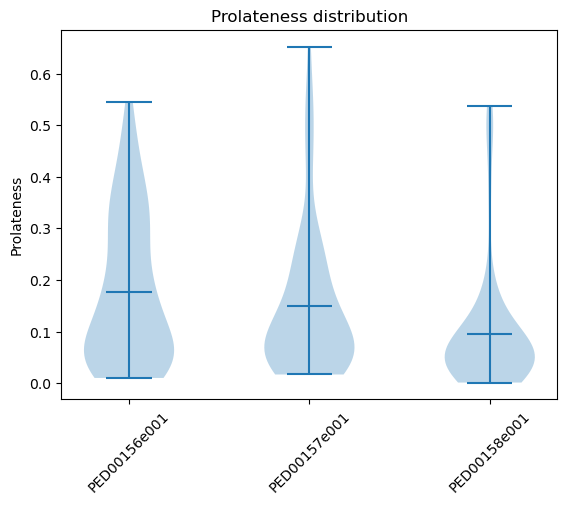

In [ ]:
analysis.plot_prolateness_dist(bins=10, violin_plot=True)

Pearson coeff for PED00156e001 = -0.624
Pearson coeff for PED00157e001 = 0.087
Pearson coeff for PED00158e001 = -0.02


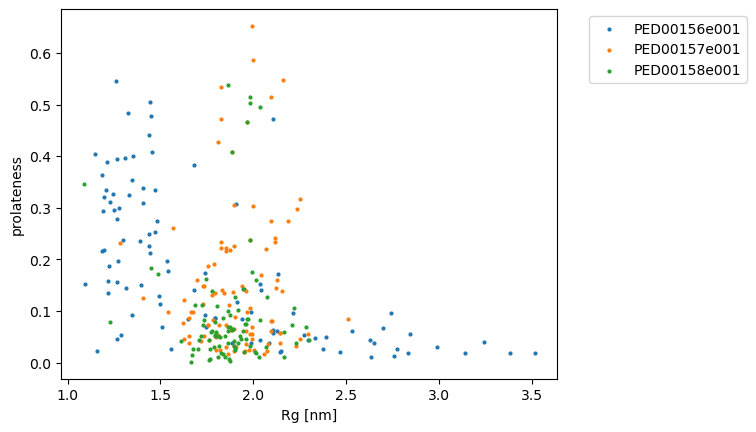

In [ ]:
analysis.plot_rg_vs_prolateness()

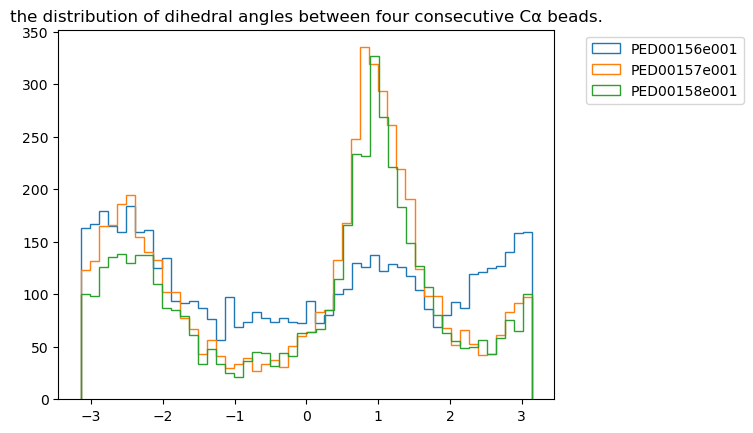

In [ ]:
analysis.plot_alpha_angles_dist()

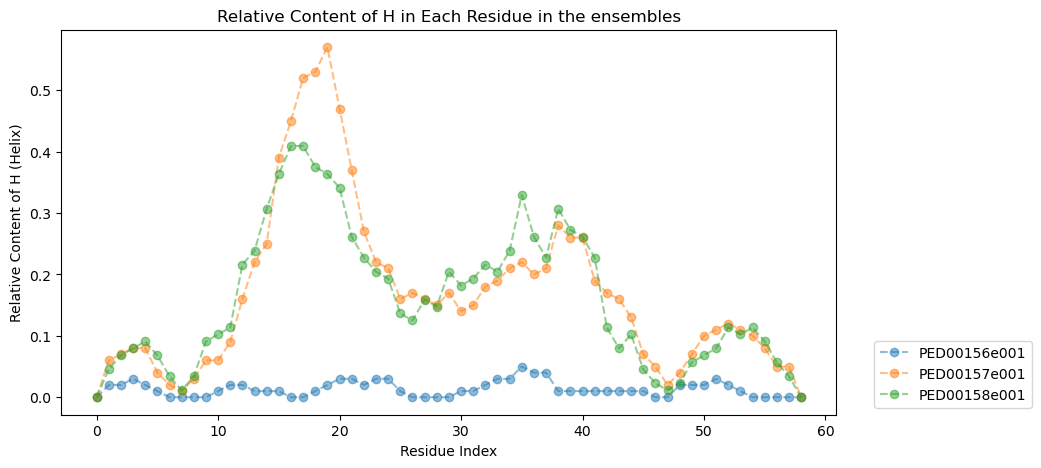

In [ ]:
analysis.plot_relative_helix_content()

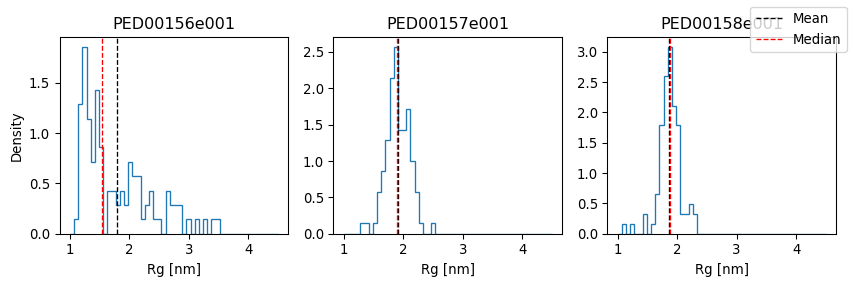

In [ ]:
analysis.trajectories_plot_rg_comparison()

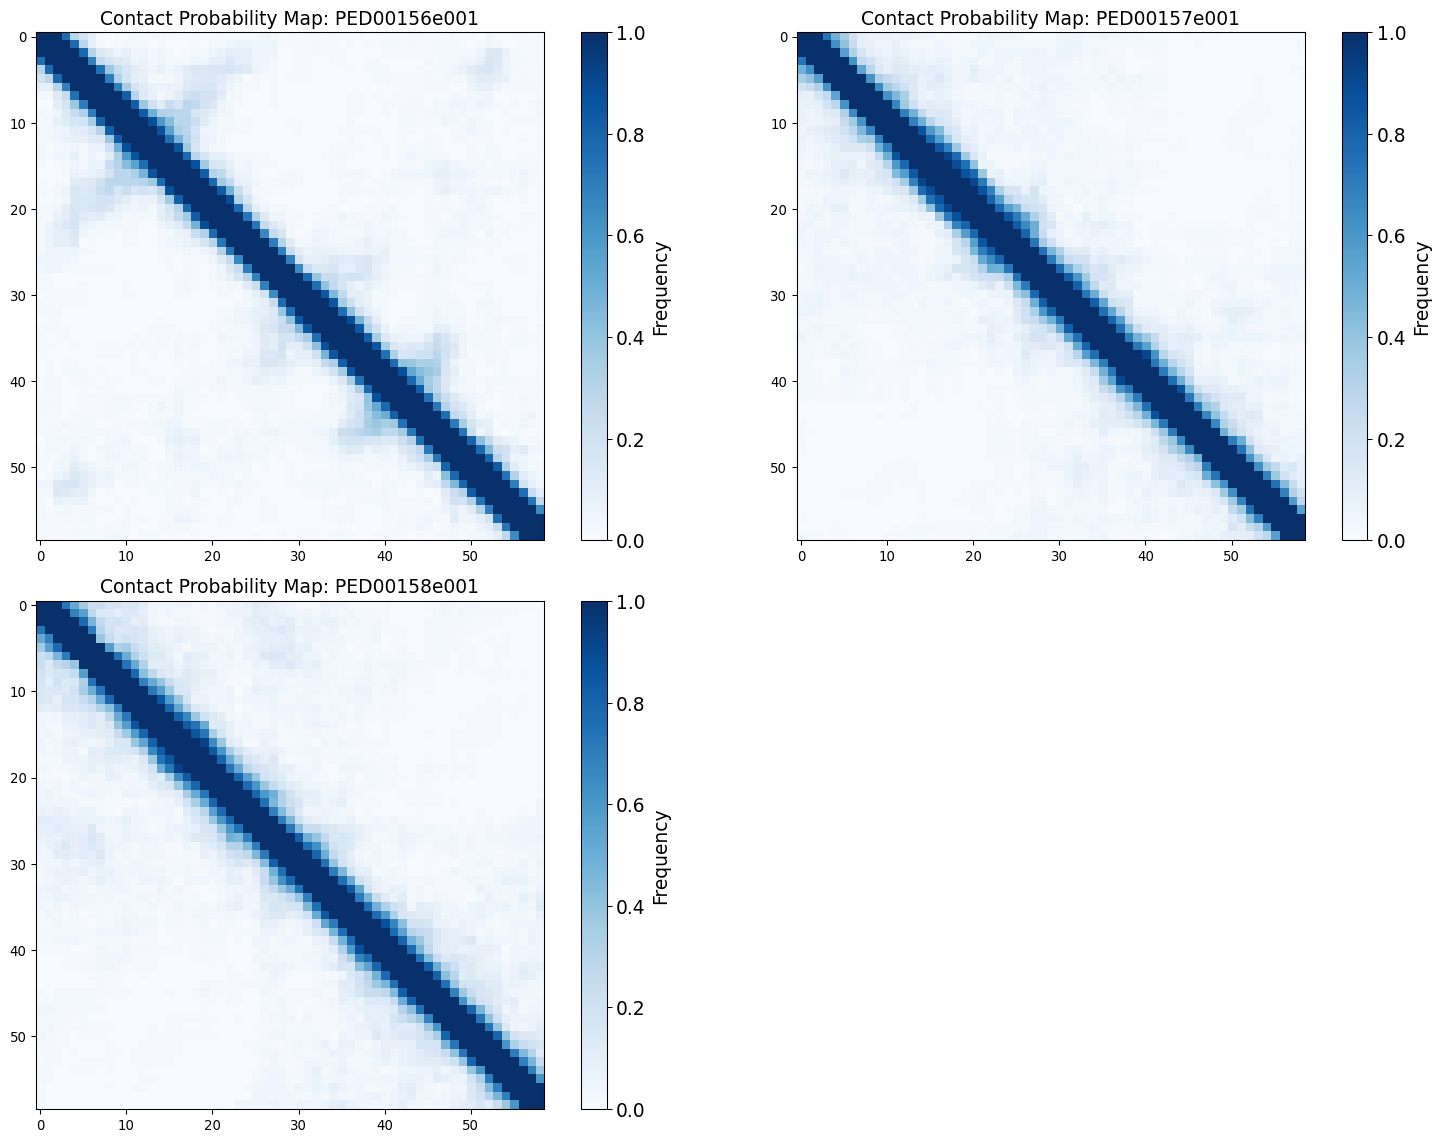

In [ ]:
analysis.plot_contact_prob(threshold=0.9)

Performing feature extraction for Ensemble: PED00156e001.
Transformed ensemble shape: (100, 116)
Performing feature extraction for Ensemble: PED00157e001.
Transformed ensemble shape: (100, 116)
Performing feature extraction for Ensemble: PED00158e001.
Transformed ensemble shape: (88, 116)
Feature names: ['GLU2-PHI', 'ALA3-PHI', 'ILE4-PHI', 'ALA5-PHI', 'LYS6-PHI', 'HIS7-PHI', 'ASP8-PHI', 'PHE9-PHI', 'SER10-PHI', 'ALA11-PHI', 'THR12-PHI', 'ALA13-PHI', 'ASP14-PHI', 'ASP15-PHI', 'GLU16-PHI', 'LEU17-PHI', 'SER18-PHI', 'PHE19-PHI', 'ARG20-PHI', 'LYS21-PHI', 'THR22-PHI', 'GLN23-PHI', 'ILE24-PHI', 'LEU25-PHI', 'LYS26-PHI', 'ILE27-PHI', 'LEU28-PHI', 'ASN29-PHI', 'MET30-PHI', 'GLU31-PHI', 'ASP32-PHI', 'ASP33-PHI', 'SER34-PHI', 'ASN35-PHI', 'TRP36-PHI', 'TYR37-PHI', 'ARG38-PHI', 'ALA39-PHI', 'GLU40-PHI', 'LEU41-PHI', 'ASP42-PHI', 'GLY43-PHI', 'LYS44-PHI', 'GLU45-PHI', 'GLY46-PHI', 'LEU47-PHI', 'ILE48-PHI', 'PRO49-PHI', 'SER50-PHI', 'ASN51-PHI', 'TYR52-PHI', 'ILE53-PHI', 'GLU54-PHI', 'MET55-PHI', 

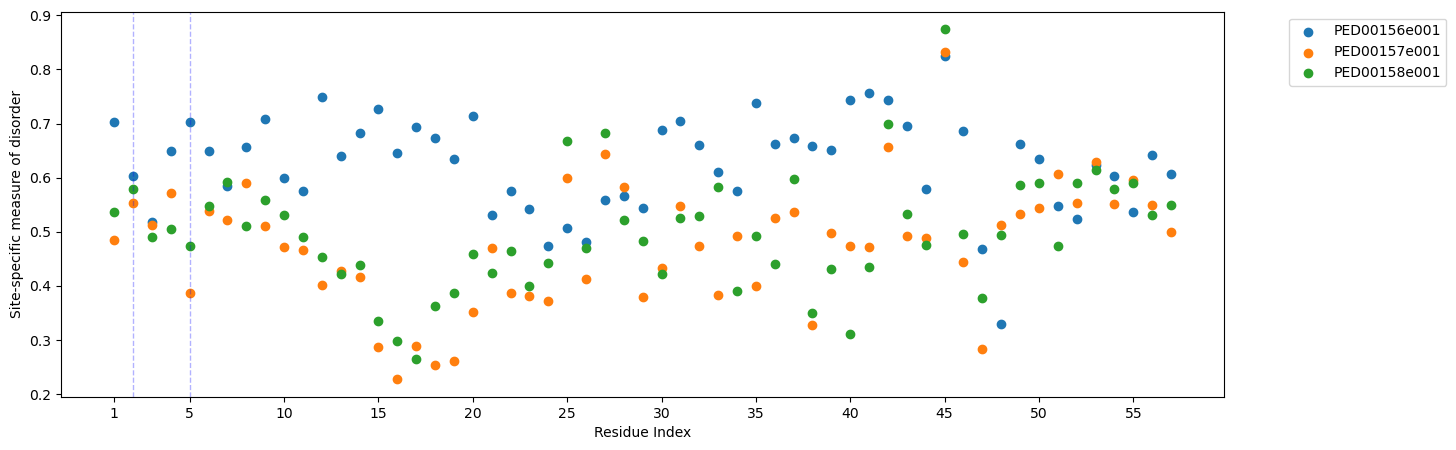

In [ ]:
analysis.plot_ss_measure_disorder(pointer=[2,5])

In [ ]:
# analysis.random_sample_trajectories(sample_size=200)

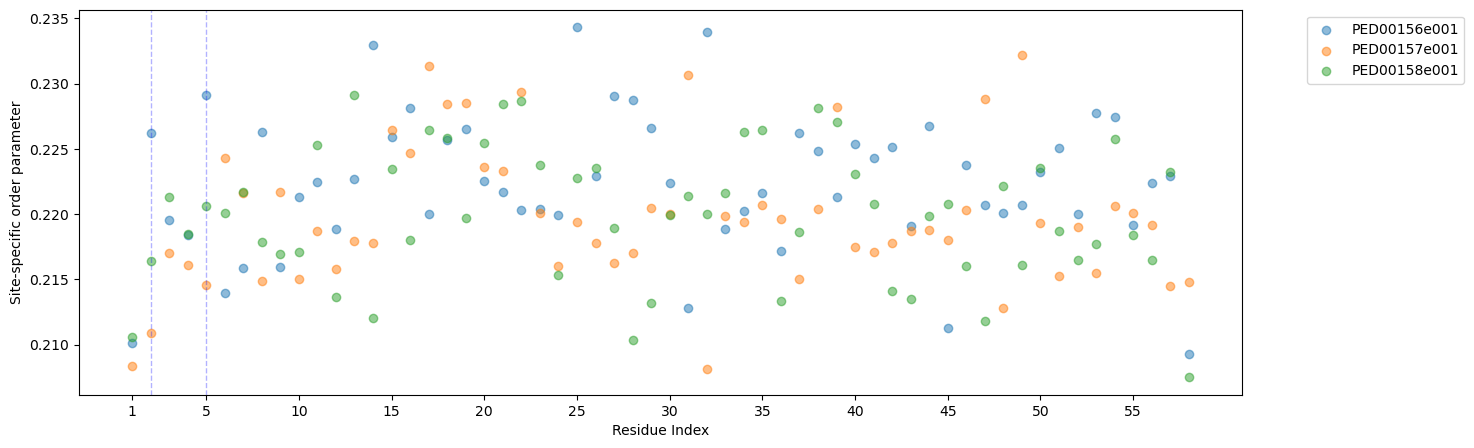

In [ ]:
analysis.plot_ss_order_parameter(pointer=[5,2])

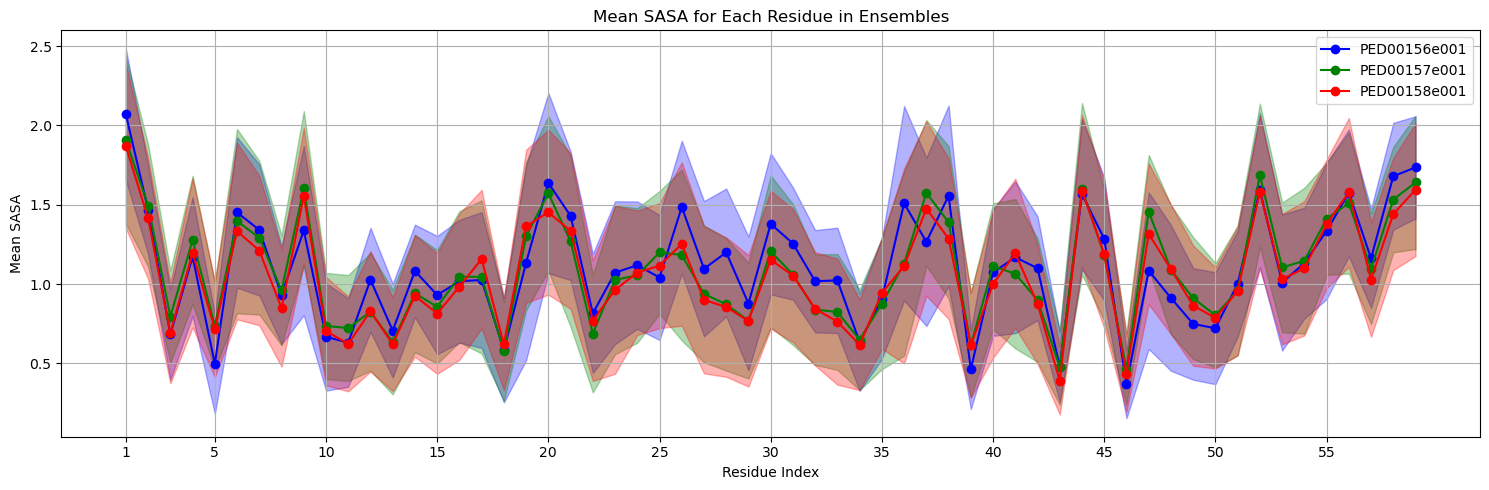

In [ ]:
analysis.plot_local_sasa()

# Ensemble: PED00156e001
features: (100, 1653)
distance matrix: (59, 59)


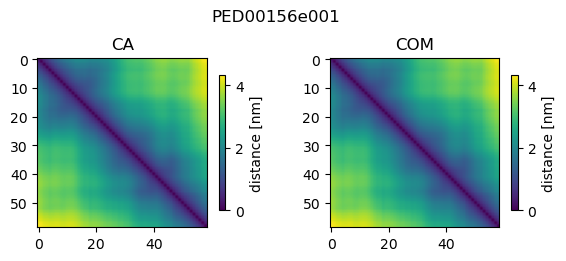

# Ensemble: PED00157e001
features: (100, 1653)
distance matrix: (59, 59)


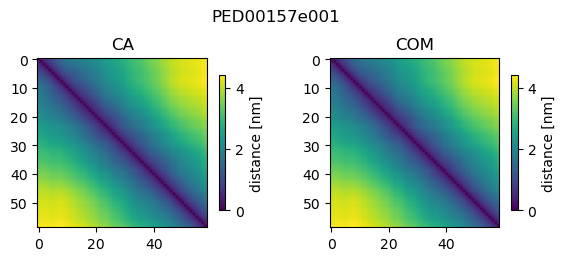

# Ensemble: PED00158e001
features: (88, 1653)
distance matrix: (59, 59)


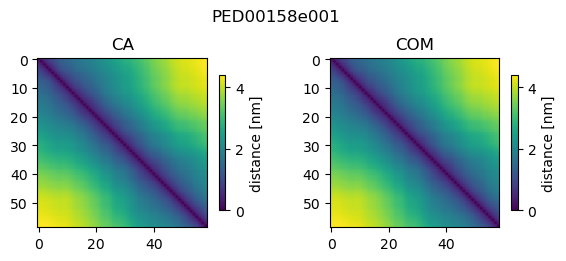

In [ ]:
analysis.plot_dist_ca_com(min_sep=2)

In [5]:
traj =analysis.trajectories

In [25]:
ca_indices = traj['PED00160e001'].topology.select('name CA')
len(ca_indices)

92

In [23]:
import mdtraj
mdtraj.compute_distances(traj['PED00161e001'], [[1, 1390]])

array([[ 3.525545  ],
       [ 8.872524  ],
       [ 9.764197  ],
       [ 6.751118  ],
       [10.906969  ],
       [ 8.059501  ],
       [ 7.748584  ],
       [ 2.4324083 ],
       [ 2.5291777 ],
       [ 3.6162276 ],
       [ 6.839266  ],
       [ 6.751118  ],
       [ 4.6367254 ],
       [ 3.2172475 ],
       [ 4.4995594 ],
       [ 8.826876  ],
       [ 4.9314203 ],
       [ 6.395308  ],
       [ 3.448329  ],
       [ 5.694657  ],
       [ 5.7250814 ],
       [ 8.321746  ],
       [ 7.3467693 ],
       [10.622635  ],
       [11.281947  ],
       [ 6.8960514 ],
       [ 8.459161  ],
       [ 9.243833  ],
       [ 4.39746   ],
       [ 8.701524  ],
       [ 9.829293  ],
       [ 3.0279968 ],
       [ 1.0340856 ],
       [ 9.764197  ],
       [ 9.90105   ],
       [ 5.133596  ],
       [ 3.608553  ],
       [ 8.418476  ],
       [ 5.5691943 ],
       [ 8.981822  ],
       [ 6.500302  ],
       [ 3.525545  ],
       [ 9.215045  ],
       [ 7.58166   ],
       [ 6.4582424 ],
       [ 4

In [10]:
ca_indices[-1]

1390